# TELESCOPIO ESPACIAL JAMES WEBB
PLANTEAMIENTO DEL SISTEMA DE ECUACIONES PARA EL TELESCOPIO

- Concición de perperdicularidad
- Ubicación y funcionalidad de los pistones
- Prototipo del telescopio espacial

<p align="center">
<img src="Imagenes/Telescopio_espacial.png" alt="image" width="600"/>
</p>

DESCRIPCION DEL MODELO:
- El centro de la base 'B' esta dada por el punto *B($x_{0}$,$y_{0}$)* que por defecto se encuentra en *P(0,0)*.
-  El punto *P($x_{1}$,$y_{1}$)* representa el objetivo al que el espejo debe orientarse.
- El centro del espejo secundario 'L' esta dada por el punto *L($x_{2}$,$y_{2}$)* que por defecto se encuentra en (0,7.5).

### CONDICIÓN DE PERPERDICULARIDAD
Para asegurar que el espejo secundario esté orientado de forma que su superficie sea perpendicular a la dirección hacia el punto *P($x_{1}$,$y_{1}$)*, consideremos la siguiente geometría y planteamiento:
- **Punto medio del espejo secundario:**  Llamaremos *L($x_{2}$,$y_{2}$)* al punto medio del espejo, ubicado en una posición específica en el plano cartesiano.
- **Vector hacia el punto objetivo, $\vec{P}$:** Definimos el vector que va desde el punto medio del espejo *L($x_{2}$,$y_{2}$)* hacia el punto *P($x_{1}$,$y_{1}$)* como: <br>
  $\vec{P}$=($x_{1}$-$x_{2}$ , $y_{1}$-$y_{2}$)
- **Vector normal del espjo, $\vec{L}$:** Para cumplir con la condición de perpendicularidad, necesitamos un vector normal al espejo secundario. Definimos este vector normal $\vec{L}$ como: <br>
  $\vec{L}$=(-($y_{1}$-$y_{2}$),$x_{1}$-$x_{2}$) <br>
  De tal manera que si realizamos un producto punto entre $\vec{P}$ y $\vec{L}$ este de cero.


In [113]:
import numpy as np
import matplotlib.pyplot as plt

def verificar_perpendicularidad_grafica(x1, y1, x2, y2):
    
    vector_P = np.array([x1 - x2, y1 - y2])
    vector_L = np.array([-(y1 - y2), x1 - x2])             
    
    producto_punto = np.dot(vector_P, vector_L)             # Calcular el producto punto
    
    es_perpendicular = np.isclose(producto_punto, 0)        # Verificar la condición de perpendicularidad
    
    # Mostrar resultados
    print("Vector P:", vector_P)
    print("Vector L:", vector_L)
    print("Producto punto (P . L):", producto_punto)
    
    if es_perpendicular:
        print("El punto 'P' SI es perpendicular con el espejo secundario 'L'")
    else:
        print("El punto 'P' NO es perpendicular con el espejo secundario 'L'")
    
    # Graficar
    plt.figure(figsize=(8, 8))
    plt.axhline(0, color='grey',linewidth=0.5)
    plt.axvline(0, color='grey',linewidth=0.5)

    plt.plot(x2, y2, 'bo', label="Centro del espejo L")     # Punto L
    plt.plot(x1, y1, 'ro', label="Punto objetivo P")        # Punto P

    # Dibujar vector P
    plt.quiver(x2, y2, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='r', label=r"$\vec{P}$")
    
    # Dibujar vector L
    plt.quiver(x2, y2, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='b', label=r"$\vec{L}$")
    
    # Configuración de la gráfica
    plt.xlim(min(x1, x2) - 2, max(x1, x2) + 2)
    plt.ylim(min(y1, y2) - 2, max(y1, y2) + 2)
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Condición de perpendicularidad")
    plt.legend()
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

Vector P: [5 3]
Vector L: [-3  5]
Producto punto (P . L): 0
El punto 'P' SI es perpendicular con el espejo secundario 'L'


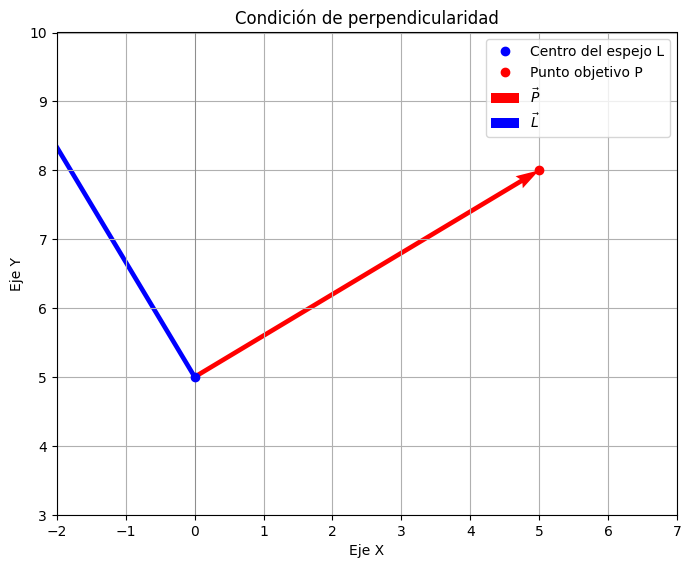

In [114]:
# Ejemplo
x1, y1 = 5,8         # Coordenadas de 'P'
x2, y2 = 0,5         # Coordenadas del centro del espejo
verificar_perpendicularidad_grafica(x1, y1, x2, y2)

### UBICACIÓN Y FUNCIONALIDAD DE LOS PISTONES
Una vez creada la condición de perpendicularidad, ahora nos encargaremos de la todo relacionado al funcionamiento y ubicación de los pistones. Por lo que se ha considerado lo siguente:
- **Base del telescopio, *B*:**
    - Este tiene una longitud *A [m]*.
    - El punto medio de la base *'B'* esta dada por *B(0,0)*.
    - El punto de anclaje izquierdo para el pistón 1 en la base esta dada por *PA1(-(A/2), 0)*
    - El punto de anclaje derecho para el pistón 2 en la base esta dada por *PA2((A/2), 0)*
- **Pistones, *PS*:**
    - Cada piston tiene una misma longitud maxima de *B [m]*
    - Cada piston tiene la posibilidad de contraerse *B/2 [m]*
- **Espejo secundario, *L*:**
    - Este tiene una longitud *C [m]*
    - El punto medio del espejo secundario esta dada por *L($x_{2}$,$y_{2}$)*
    - El punto de anclaje izquierdo para el pistón 1 en el espejo secundario esta dada por PA3(-(C/2), $y_{2}$)
    - El punto de anclaje izquierdo para el pistón 2 en el espejo secundario esta dada por PA4(C/2), $y_{2}$)

Tomando en cuenta estas consideraciones, procederemos a crear una función para calcular las longitudes en los movimientos de los pistones


In [110]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_longitudes_pistones(A, B, C, x2, y2):
   
    PA1_base = np.array([-A/2, 0])              # Punto de anclaje izquierdo en la base (Pistón 1)
    PA2_base = np.array([A/2, 0])               # Punto de anclaje derecho en la base (Pistón 2)
    PA3_espejo = np.array([x2 - C/2, y2])       # Punto de anclaje izquierdo en el espejo (Pistón 1)
    PA4_espejo = np.array([x2 + C/2, y2])       # Punto de anclaje derecho en el espejo (Pistón 2)
    
    piston1 = np.linalg.norm(PA3_espejo - PA1_base)     # Longitud del pistón 1
    piston2 = np.linalg.norm(PA4_espejo - PA2_base)     # Longitud del pistón 2
    
    # Verificar si las longitudes están dentro del rango permitido [B/2, B]

    if (piston1 and piston2 >= B/2) and (piston1 and piston2 <= B):
        
        print(f"La longitud del Pistón_1 = {piston1:.2f} [m] y la longitud del Pistón_2 = {piston2:.2f} [m] están en el rango permitido [{B/2}, {B}]")

        plt.figure(figsize=(10, 10))

        # Graficar puntos de anclaje en la base y en el espejo
        plt.plot(PA1_base[0], PA1_base[1], 'go', label="PA1")
        plt.plot(PA2_base[0], PA2_base[1], 'bo', label="PA2")
        plt.plot(PA3_espejo[0], PA3_espejo[1], 'mo', label="PA3")
        plt.plot(PA4_espejo[0], PA4_espejo[1], 'co', label="PA4")
        plt.plot(x2, y2, 'ro', label="L")

        # Dibujar los pistones (líneas entre puntos de anclaje en base y espejo)
        plt.plot([PA1_base[0], PA3_espejo[0]], [PA1_base[1], PA3_espejo[1]], 'g-', label=f"Pistón 1")
        plt.plot([PA2_base[0], PA4_espejo[0]], [PA2_base[1], PA4_espejo[1]], 'b-', label=f"Pistón 2")
        
        # Dibujar la base y el espejo
        plt.plot([-A/2, A/2], [0, 0], 'k-', label="Base del telescopio")
        plt.plot([x2 - C/2, x2 + C/2], [y2, y2], 'r-', label="Espejo secundario")
        
        # Configuración de la gráfica
        plt.axhline(0, color='black', linewidth=1)
        plt.axvline(0, color='black', linewidth=1)
        plt.xlim(min(PA1_base[0], PA2_base[0], PA3_espejo[0], PA4_espejo[0]) - 1, max(PA1_base[0], PA2_base[0], PA3_espejo[0], PA4_espejo[0]) + 1)
        plt.ylim(min(0, y2) - 1, max(0, y2) + 1)
        
        plt.xlabel("Eje X")
        plt.ylabel("Eje Y")
        plt.title("Ubicación de los Pistones y el Espejo Secundario")
        plt.legend()
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
    else:
        print(f"La longitud del Pistón_1 = {piston1:.2f} [m] y la longitud del Pistón_2 = {piston2:.2f} [m] no están en el rango permitido [{B/2}, {B}]")


La longitud del Pistón_1 = 8.08 [m] y la longitud del Pistón_2 = 7.57 [m] están en el rango permitido [5.0, 10]


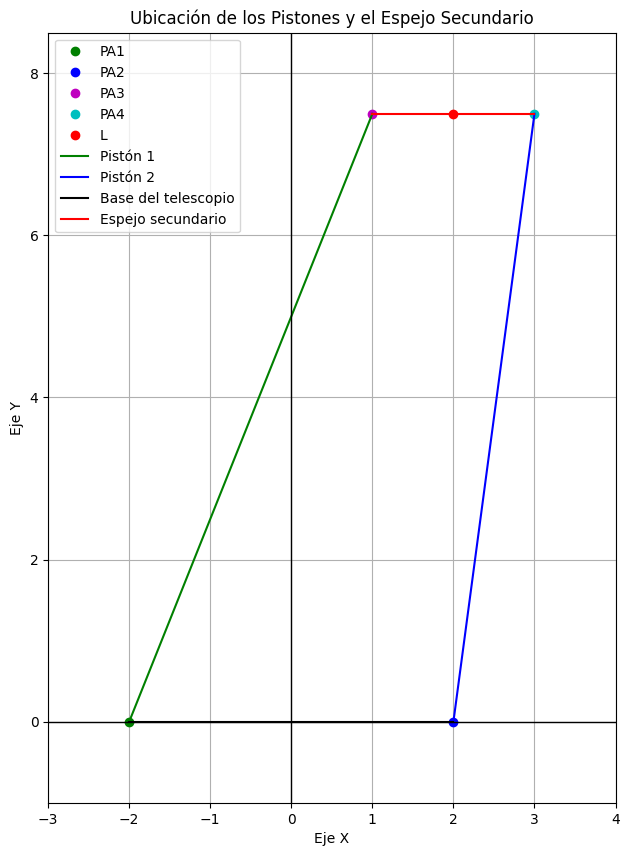

In [111]:
# Ejemplo
A = 4               # Longitud de la base
B = 10              # Longitud máxima de los pistones
C = 2               # Longitud del espejo secundario
x2, y2 = 2,7.5      # Coordenadas del centro del espejo

calcular_longitudes_pistones(A, B, C, x2, y2)

# PROTOTIPO DEL TELESCOPIO ESPACIAL
Finalizada la condición de perpendicularidad, ubicación y funcionalidad de los pistones, se procederá a unir estos conceptos para asi poder crear un primer prototipo del telescopio espacial, quedando de la siguiente manera:

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def prototipo_telescopio(A, B, C, x1, y1, x2, y2):
    PA1_base = np.array([-A/2, 0])                  # Punto de anclaje izquierdo en la base (Pistón 1)
    PA2_base = np.array([A/2, 0])                   # Punto de anclaje derecho en la base (Pistón 2)
    PA3_espejo = np.array([x2 - C/2, y2 - (C / 2)])           # Punto de anclaje izquierdo en el espejo (Pistón 1)
    PA4_espejo = np.array([x2 + C/2, y2 + (C / 2)])           # Punto de anclaje derecho en el espejo (Pistón 2)
    centro_base = np.array([0,0])                   # Punto medio de la base
    punto_P = np.array([x1, y1])                    # Coordenadas del punto 'P'

    vector_P = np.array([x1 - x2, y1 - y2])         # Vector 'P'
    vector_L = np.array([-(y1 - y2), x1 - x2])      # Vector normal 'L' 
    
    piston1 = np.linalg.norm(PA3_espejo - PA1_base)     # Longitud del pistón 1
    piston2 = np.linalg.norm(PA4_espejo - PA2_base)     # Longitud del pistón 2

    angulo_P = np.degrees(np.arctan2(vector_P[1], vector_P[0]))      # Calcular el angulo del vector 'P' con respecto al eje x

    if ((piston1 and piston2 >= B/2) and (piston1 and piston2 <= B)) and (angulo_P >= 0 and angulo_P <= 180):
        print(f"La longitud del Pistón_1 = {piston2:.2f} [m] y la longitud del Pistón_2 = {piston1:.2f} [m] están en el rango permitido [{B/2}, {B}]",
              f"\nY el angulo {angulo_P:.2f}° esta dentro del rango permitido [0° a 180°].")
        
        vector_L_normalizado = vector_L / np.linalg.norm(vector_L)              # Normalizar el vector L para usarlo en la dirección del espejo secundario

        # Calcular los puntos de anclaje en el espejo a lo largo del vector L
        PA4_espejo = np.array([x2 - C/2 * vector_L_normalizado[0], y2 - (C / 2) * vector_L_normalizado[1]])           # Punto de anclaje izquierdo en el espejo (Pistón 1)
        PA3_espejo = np.array([x2 + C/2 * vector_L_normalizado[0], y2 + (C / 2) * vector_L_normalizado[1]])           # Punto de anclaje derecho en el espejo (Pistón 2)

        plt.figure(figsize=(10, 10))

        # Graficar puntos de anclaje en la base y en el espejo
        plt.plot(PA1_base[0], PA1_base[1], 'go', label="PA1")
        plt.plot(PA2_base[0], PA2_base[1], 'bo', label="PA2")
        plt.plot(PA3_espejo[0], PA3_espejo[1], 'mo', label="PA3")
        plt.plot(PA4_espejo[0], PA4_espejo[1], 'co', label="PA4")
        plt.plot(x2, y2, 'ro', label="Punto medio")

         # Dibujar los pistones (líneas entre puntos de anclaje en base y espejo)
        plt.plot([PA1_base[0], PA3_espejo[0]], [PA1_base[1], PA3_espejo[1]], 'g--', label=f"Pistón 1")
        plt.plot([PA2_base[0], PA4_espejo[0]], [PA2_base[1], PA4_espejo[1]], 'b--', label=f"Pistón 2")
        
        # Dibujar la base y el espejo
        plt.plot([-A/2, A/2], [0, 0], 'k-', label="Base del telescopio")
        plt.plot([PA3_espejo[0], PA4_espejo[0]], [PA3_espejo[1], PA4_espejo[1]], 'r-', label='Espejo Secundario')
       # plt.plot([x2 - C/2 * vector_L_normalizado[0], y2 - (C / 2) * vector_L_normalizado[1]], [x2 + C/2 * vector_L_normalizado[0], y2 + (C / 2) * vector_L_normalizado[1]], 'r-', label="Espejo secundario")

        # Graficar el punto P
        plt.plot(x1, y1, 'ro', label='Punto P')

        # Vector P y Vector L desde el espejo
        plt.quiver(x2, y2, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='orange', label=r"$\vec{P}$")
        plt.quiver(x2, y2, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='purple', label=r"$\vec{L}$")

        # Configuración de la gráfica
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Telescopio Espacial')
        plt.grid()
        plt.legend()
        plt.axis('equal')
        plt.show()

        print("Se ha detectado que la estrella se encuenta a: ", np.linalg.norm(vector_P), "[m]" )

    else:
        print(f"La longitud del Pistón_1 = {piston2:.2f} [m] ó la longitud del Pistón_2 = {piston1:.2f} [m] están en el rango permitido [{B/2}, {B}]",
              f"\nO el angulo {angulo_P:.2f}° esta fuera del rango permitido [0° a 180°].")

La longitud del Pistón_1 = 9.71 [m] y la longitud del Pistón_2 = 6.80 [m] están en el rango permitido [5.0, 10] 
Y el angulo 177.80° esta dentro del rango permitido [0° a 180°].


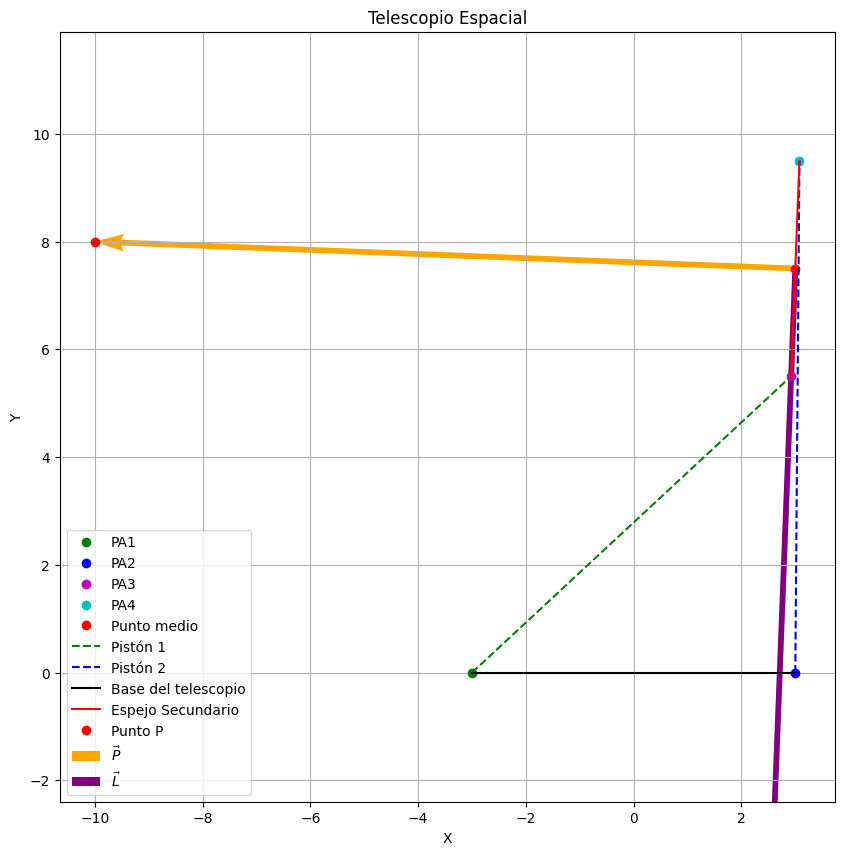

Se ha detectado que la estrella se encuenta a:  13.009611831257688 [m]


In [109]:
# Ejemplo
A = 6               # Longitud de la base
B = 10              # Longitud máxima de los pistones
C = 4               # Longitud del espejo secundario
x1, y1 = -10, 8     # Coordenada del punto 'P'
x2, y2 = 3,7.5      # Coordenadas del centro del espejo

prototipo_telescopio(A, B, C, x1, y1, x2, y2)

# SEGUNDO PROTOTIPO DEL TELESCOPIO ESPACIAL
Como en el primer prototipo, el punto centro del espejo secundario es estatico. En este segundo prototipo lo que se realizará es que dicho punto sea dinamico, por lo que:

<Figure size 640x480 with 0 Axes>

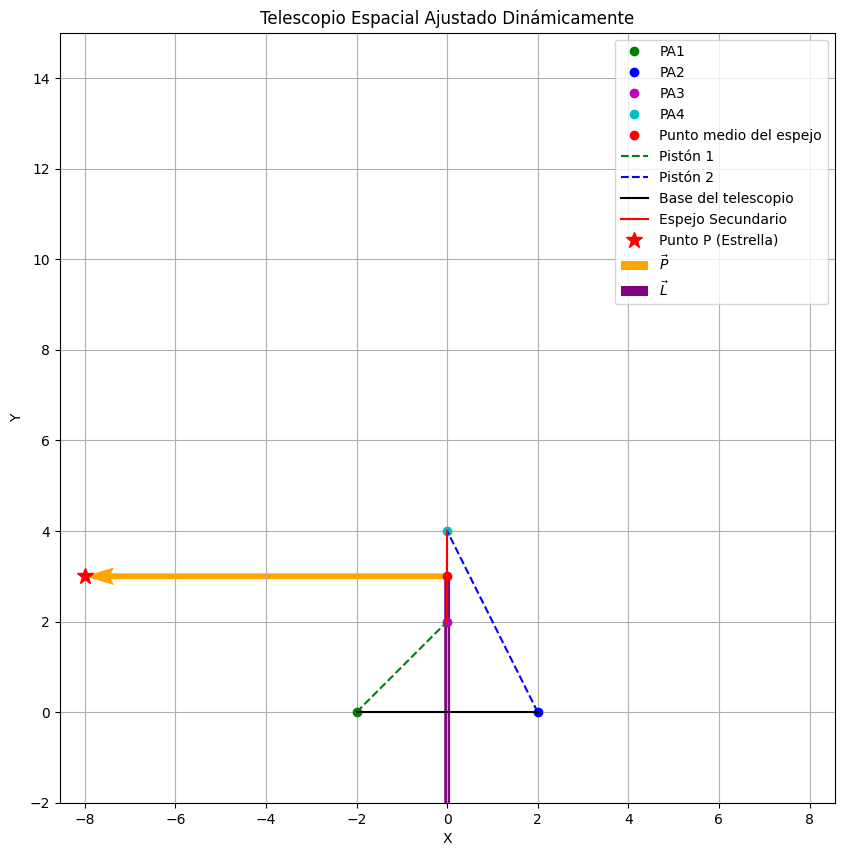

Punto medio del espejo ajustado dinámicamente: (0.00, 3.00)
Longitudes de los pistones: Pistón 1 = 2.83 m, Pistón 2 = 4.47 m
Ángulo del vector P: 180.00°


In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def costo(pos, A, B, C, x1, y1):
    x2, y2 = pos
    PA1_base = np.array([-A / 2, 0])
    PA2_base = np.array([A / 2, 0])
    
    vector_P = np.array([x1 - x2, y1 - y2])
    vector_L = np.array([-(y1 - y2), x1 - x2])
    
    # Asegurarse de que la normalización no cause un problema por división por cero
    norm_vector_L = np.linalg.norm(vector_L)
    if norm_vector_L < 1e-6:  # Si la magnitud del vector es muy pequeña
        vector_L_normalizado = np.array([0, 0])  # Evitar la división por cero
    else:
        vector_L_normalizado = vector_L / norm_vector_L  # Normalizar correctamente
    
    PA3_espejo = np.array([x2 - (C / 2) * vector_L_normalizado[0], y2 - (C / 2) * vector_L_normalizado[1]])
    PA4_espejo = np.array([x2 + (C / 2) * vector_L_normalizado[0], y2 + (C / 2) * vector_L_normalizado[1]])
    
    piston1 = np.linalg.norm(PA3_espejo - PA1_base)
    piston2 = np.linalg.norm(PA4_espejo - PA2_base)
    angulo_P = np.degrees(np.arctan2(vector_P[1], vector_P[0]))
    
    perpendicularidad = abs(np.dot(vector_P, vector_L))
    penalizacion_longitud = 0
    if not (B / 2 <= piston1 <= B):
        penalizacion_longitud += abs(piston1 - B) if piston1 > B else abs(piston1 - B / 2)
    if not (B / 2 <= piston2 <= B):
        penalizacion_longitud += abs(piston2 - B) if piston2 > B else abs(piston2 - B / 2)
    
    penalizacion_angulo = 0
    if not (0 <= angulo_P <= 180):
        penalizacion_angulo += abs(angulo_P - 90)
    
    return perpendicularidad + penalizacion_longitud + penalizacion_angulo

def restriccion_angulo(pos, x1, y1):
    """ Restricción para asegurar que el ángulo del vector P esté en el rango [0, 180]. """
    x2, y2 = pos
    vector_P = np.array([x1 - x2, y1 - y2])
    angulo_P = np.degrees(np.arctan2(vector_P[1], vector_P[0]))
    return 180 - abs(angulo_P)  # La restricción es no exceder 180°

def prototipo_telescopio(A, B, C, x1, y1):
    plt.clf()  # Limpiar la figura anterior
    
    # Ajuste sin restricción inicial estricta, se optimiza desde un punto inicial
    # Asegúrate de que y2_inicial esté por encima de 0 para que se eleve el centro del espejo
    x2_inicial, y2_inicial = 0, 3.0  # Iniciar más alto para permitir que se eleve
    
    # Restricciones adicionales para el ángulo (sin límites sobre el valor inicial de x2, y2)
    restricciones = ({
        'type': 'ineq',  # Restricción de desigualdad: g(x) >= 0
        'fun': restriccion_angulo,
        'args': (x1, y1)  # Pasa x1 y y1 como argumentos adicionales
    })
    
    # Optimización sin restricciones estrictas sobre los valores iniciales
    resultado = minimize(
        costo, 
        [x2_inicial, y2_inicial], 
        args=(A, B, C, x1, y1),
        bounds=[(-10, 10), (0, 15)],  # Límites para la búsqueda de (x2, y2)
        constraints=restricciones
    )
    
    # Obtener la solución óptima
    x2_opt, y2_opt = resultado.x
    
    # Parámetros ajustados
    PA1_base = np.array([-A / 2, 0])
    PA2_base = np.array([A / 2, 0])
    vector_P = np.array([x1 - x2_opt, y1 - y2_opt])
    vector_L = np.array([-(y1 - y2_opt), x1 - x2_opt])
    
    # Asegurarse de que la normalización no cause un problema por división por cero
    norm_vector_L = np.linalg.norm(vector_L)
    if norm_vector_L < 1e-6:  # Si la magnitud del vector es muy pequeña
        vector_L_normalizado = np.array([0, 0])  # Evitar la división por cero
    else:
        vector_L_normalizado = vector_L / norm_vector_L  # Normalizar correctamente
    
    PA4_espejo = np.array([x2_opt - (C / 2) * vector_L_normalizado[0], y2_opt - (C / 2) * vector_L_normalizado[1]])
    PA3_espejo = np.array([x2_opt + (C / 2) * vector_L_normalizado[0], y2_opt + (C / 2) * vector_L_normalizado[1]])
    
    piston1 = np.linalg.norm(PA3_espejo - PA1_base)
    piston2 = np.linalg.norm(PA4_espejo - PA2_base)
    angulo_P = np.degrees(np.arctan2(vector_P[1], vector_P[0]))
    
    # Verificar si las longitudes de los pistones y el ángulo están en los rangos permitidos
    if not (B / 2 <= piston1 <= B) or not (B / 2 <= piston2 <= B) or not (0 <= angulo_P <= 180):
        print(f"La longitud del Pistón_1 = {piston1:.2f} [m] o la longitud del Pistón_2 = {piston2:.2f} [m] están fuera del rango permitido [{B/2}, {B}]")
        print(f"O el ángulo {angulo_P:.2f}° está fuera del rango permitido [0° a 180°].")
        return  # No se grafica si no está en el rango permitido
    
    # Graficar resultados si todo está en rango
    plt.figure(figsize=(10, 10))
    plt.plot(PA1_base[0], PA1_base[1], 'go', label="PA1")
    plt.plot(PA2_base[0], PA2_base[1], 'bo', label="PA2")
    plt.plot(PA3_espejo[0], PA3_espejo[1], 'mo', label="PA3")
    plt.plot(PA4_espejo[0], PA4_espejo[1], 'co', label="PA4")
    plt.plot(x2_opt, y2_opt, 'ro', label="Punto medio del espejo")
    plt.plot([PA1_base[0], PA3_espejo[0]], [PA1_base[1], PA3_espejo[1]], 'g--', label=f"Pistón 1")
    plt.plot([PA2_base[0], PA4_espejo[0]], [PA2_base[1], PA4_espejo[1]], 'b--', label=f"Pistón 2")
    plt.plot([-A / 2, A / 2], [0, 0], 'k-', label="Base del telescopio")
    plt.plot([PA3_espejo[0], PA4_espejo[0]], [PA3_espejo[1], PA4_espejo[1]], 'r-', label="Espejo Secundario")
    plt.plot(x1, y1, 'r*', markersize=12, label="Punto P (Estrella)")
    plt.quiver(x2_opt, y2_opt, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='orange', label=r"$\vec{P}$")
    plt.quiver(x2_opt, y2_opt, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='purple', label=r"$\vec{L}$")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Telescopio Espacial Ajustado Dinámicamente')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.xlim(-10, 10)
    plt.ylim(-2, 15)
    plt.show()
    
    # Imprimir resultados
    print(f"Punto medio del espejo ajustado dinámicamente: ({x2_opt:.2f}, {y2_opt:.2f})")
    print(f"Longitudes de los pistones: Pistón 1 = {piston1:.2f} m, Pistón 2 = {piston2:.2f} m")
    print(f"Ángulo del vector P: {angulo_P:.2f}°")

# Ejemplo de uso
prototipo_telescopio(A=4, B=5, C=2, x1=-8, y1=3)


# TERCER PROTOTIPO DEL TELESCOPIO ESPACIAL

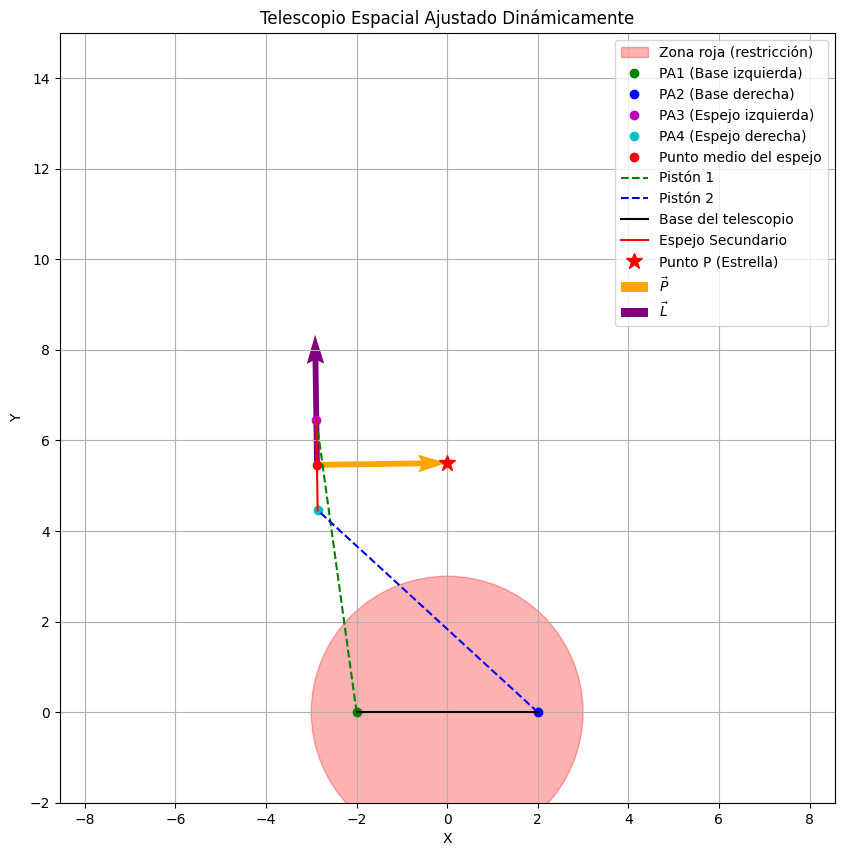

Punto medio del espejo ajustado dinámicamente: (-2.87, 5.46)
Longitudes de los pistones: Pistón 1 = 6.52 m, Pistón 2 = 6.60 m
Ángulo del vector P: 0.82°


In [121]:
import numpy as np
import matplotlib.pyplot as plt

def prototipo_telescopio(A, B, C, x1, y1, x2_inicial, y2_inicial):
    # Optimización
    resultado = minimize(costo, [x2_inicial, y2_inicial], args=(A, B, C, x1, y1))
    x2_opt, y2_opt = resultado.x
    
    # Parámetros ajustados
    PA1_base = np.array([-A / 2, 0])
    PA2_base = np.array([A / 2, 0])
    vector_P = np.array([x1 - x2_opt, y1 - y2_opt])
    vector_L = np.array([-(y1 - y2_opt), x1 - x2_opt])
    vector_L_normalizado = vector_L / np.linalg.norm(vector_L)
    
    PA4_espejo = np.array([x2_opt - (C / 2) * vector_L_normalizado[0], y2_opt - (C / 2) * vector_L_normalizado[1]])
    PA3_espejo = np.array([x2_opt + (C / 2) * vector_L_normalizado[0], y2_opt + (C / 2) * vector_L_normalizado[1]])
    
    piston1 = np.linalg.norm(PA3_espejo - PA1_base)
    piston2 = np.linalg.norm(PA4_espejo - PA2_base)
    angulo_P = np.degrees(np.arctan2(vector_P[1], vector_P[0]))
    
    # Zona roja alrededor del telescopio (por ejemplo, un círculo de radio A/2 + 1)
    radio_zona_roja = A / 2 + 1  # Radio de la zona restringida alrededor de la base
    
    # Graficar resultados
    plt.figure(figsize=(10, 10))
    
    # Graficar la zona roja (restricción)
    circle = plt.Circle((0, 0), radio_zona_roja, color='red', alpha=0.3, label="Zona roja (restricción)")
    plt.gca().add_artist(circle)
    
    # Graficar puntos de anclaje en la base y en el espejo
    plt.plot(PA1_base[0], PA1_base[1], 'go', label="PA1 (Base izquierda)")
    plt.plot(PA2_base[0], PA2_base[1], 'bo', label="PA2 (Base derecha)")
    plt.plot(PA3_espejo[0], PA3_espejo[1], 'mo', label="PA3 (Espejo izquierda)")
    plt.plot(PA4_espejo[0], PA4_espejo[1], 'co', label="PA4 (Espejo derecha)")
    plt.plot(x2_opt, y2_opt, 'ro', label="Punto medio del espejo")
    
    # Graficar los pistones
    plt.plot([PA1_base[0], PA3_espejo[0]], [PA1_base[1], PA3_espejo[1]], 'g--', label=f"Pistón 1")
    plt.plot([PA2_base[0], PA4_espejo[0]], [PA2_base[1], PA4_espejo[1]], 'b--', label=f"Pistón 2")
    
    # Graficar la base y el espejo
    plt.plot([-A / 2, A / 2], [0, 0], 'k-', label="Base del telescopio")
    plt.plot([PA3_espejo[0], PA4_espejo[0]], [PA3_espejo[1], PA4_espejo[1]], 'r-', label="Espejo Secundario")
    
    # Graficar el punto P (estrella)
    plt.plot(x1, y1, 'r*', markersize=12, label="Punto P (Estrella)")
    
    # Vectores
    plt.quiver(x2_opt, y2_opt, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='orange', label=r"$\vec{P}$")
    plt.quiver(x2_opt, y2_opt, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='purple', label=r"$\vec{L}$")
    
    # Configuración de la gráfica
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Telescopio Espacial Ajustado Dinámicamente')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.xlim(-10, 10)  # Ajustar el rango visible
    plt.ylim(-2, 15)  # Ajustar el rango visible
    plt.show()
    
    # Imprimir resultados
    print(f"Punto medio del espejo ajustado dinámicamente: ({x2_opt:.2f}, {y2_opt:.2f})")
    print(f"Longitudes de los pistones: Pistón 1 = {piston1:.2f} m, Pistón 2 = {piston2:.2f} m")
    print(f"Ángulo del vector P: {angulo_P:.2f}°")

# Ejemplo de uso
prototipo_telescopio(A=4, B=5, C=2, x1=0, y1=5.5, x2_inicial=0, y2_inicial=7.5)
